## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [44]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [45]:
a=-1
b=2
y=a*X+b
y.reshape(-1,1)

array([[  2.        ],
       [  1.59183673],
       [  1.18367347],
       [  0.7755102 ],
       [  0.36734694],
       [ -0.04081633],
       [ -0.44897959],
       [ -0.85714286],
       [ -1.26530612],
       [ -1.67346939],
       [ -2.08163265],
       [ -2.48979592],
       [ -2.89795918],
       [ -3.30612245],
       [ -3.71428571],
       [ -4.12244898],
       [ -4.53061224],
       [ -4.93877551],
       [ -5.34693878],
       [ -5.75510204],
       [ -6.16326531],
       [ -6.57142857],
       [ -6.97959184],
       [ -7.3877551 ],
       [ -7.79591837],
       [ -8.20408163],
       [ -8.6122449 ],
       [ -9.02040816],
       [ -9.42857143],
       [ -9.83673469],
       [-10.24489796],
       [-10.65306122],
       [-11.06122449],
       [-11.46938776],
       [-11.87755102],
       [-12.28571429],
       [-12.69387755],
       [-13.10204082],
       [-13.51020408],
       [-13.91836735],
       [-14.32653061],
       [-14.73469388],
       [-15.14285714],
       [-15

### Plot X vs. y

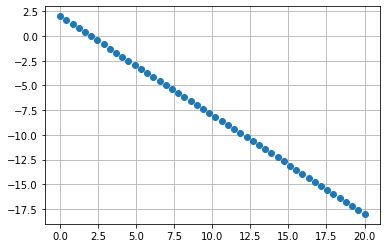

In [46]:
plt.grid()
plt.plot(X,y,'o')

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [13]:
def GD(X,y,alpha = 0.001,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    theta_n = np.zeros((X.shape[1],1))
    theta = []
    #print(theta.shape)
    curr_iter=0
    norm_gradiant_vector= 10000000
    j_mat=[]
    while(curr_iter <= max_iter):
        #curr_theta = theta[:,-1].reshape(-1,1)
        theta.append(theta_n)
        h_x = np.dot(X,theta_n)
        #print(h_x.shape)
        Error_Vector =h_x - y
        #print(Error_Vector.shape)
        j = (np.linalg.norm(Error_Vector)**2)/(2*(Error_Vector.shape[0]))
        j_mat.append(j)

       

        d_theta = np.dot(X.transpose(),Error_Vector)/(Error_Vector.shape[0])
        #print(d_theta.shape)
        norm_gradiant_vector=np.linalg.norm(d_theta)   
        if  norm_gradiant_vector < grad_norm_min  or ((len(j_mat)>1) and (abs(j_mat[-2]-j_mat[-1]) <= 0.001)):
            
            break
        theta_n=theta_n - alpha*d_theta
        
        #print(theta_n.shape)
        #

        
        print("****************** Iteration " +str(curr_iter) + " ********************"+"\n")
        print("h(x) = " + str(h_x)+"\n")
        print("Error Vector : "+ str(Error_Vector)+"\n")
        print("j = "+str(j)+"\n")
        print("gradiant vector = " + str(d_theta)+"\n")
        print("gradiant vector norm = " + str(norm_gradiant_vector)+"\n")
        print("theta : "+str(theta[-1])+"\n")  
        curr_iter+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", curr_iter-1," epochs")
    print("theta_0_Opt : ",theta[-1][0],"")
    print("theta_0_Opt : ",theta[-1][1],"")
    print("Error Vector : "+ str(Error_Vector)+"\n")
    print("h(x): y predict = " + str(h_x)+"\n")
    print("y actual: ", str(y))
    


        
    return np.array(theta).reshape((len(theta),len(theta[0]))).transpose(),j_mat 

In [47]:
X = np.linspace(0,20)
X =np.c_[np.ones((X.shape[0])),X]
X.shape

(50, 2)

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [14]:
theta, loss_mat =GD(X,y.reshape(-1,1),alpha = 0.0005,max_iter=300,grad_norm_min=0.001)
theta[:,-1]

****************** Iteration 0 ********************

h(x) = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector : [[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.734

array([-0.04520484, -0.83894495])

In [15]:
r2_score(y,X@theta[:,-1])

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [36]:


def plotLoss(loss_mat,title):
    plt.figure(figsize=(12,8))
    plt.title(title, fontweight='bold',fontsize=20)
    plt.grid()
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(loss_mat,'o-',color="black")
    
def plotThetaVsLoss(loss_mat,theta ,title,x_label="theta 0"):
    plt.figure(figsize=(12,8))
    plt.title(title, fontweight='bold',fontsize=20)
    plt.grid()
    plt.xlabel(x_label, fontweight='bold',fontsize=20)
    plt.ylabel("loss", fontweight='bold',fontsize=20)
    plt.plot(theta,loss_mat,'o-',color="black")
    
def plotAllLines(X,y,theta,title):
    plt.figure(figsize=(10,8))
    plt.title(title, fontweight='bold',fontsize=20)
    plt.plot(X[:,1],y,'o')
    plt.xlabel("X", fontweight='bold',fontsize=20)
    plt.ylabel("Y", fontweight='bold',fontsize=20)
    for i in range(theta.shape[1]):
        plt.plot(X[:,1],X@theta[:,i],color='red')
        
def plotBestFit(X,y,theta,title):
    plt.figure(figsize=(10,8))
    plt.title(title, fontweight='bold',fontsize=20)
    plt.xlabel("X", fontweight='bold',fontsize=20)
    plt.ylabel("Y", fontweight='bold',fontsize=20)
    plt.plot(X[:,1],y,'o')
    plt.plot(X[:,1],X@theta,color='red')

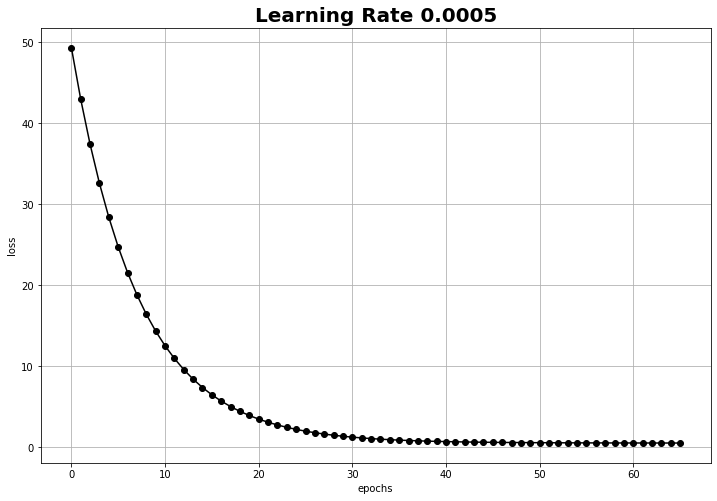

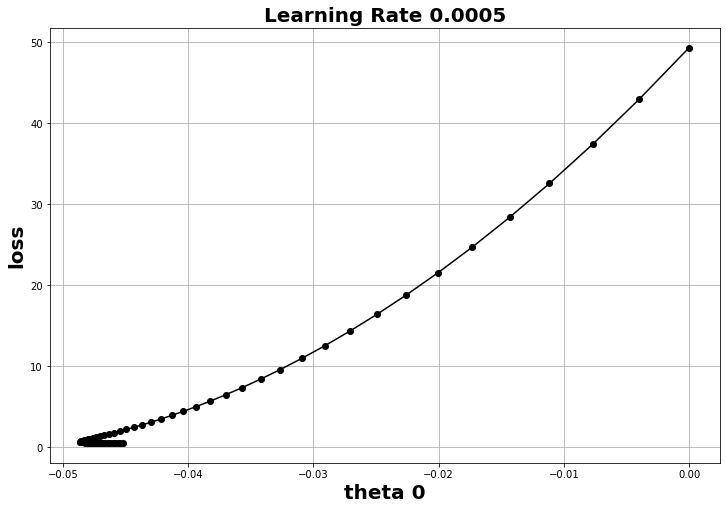

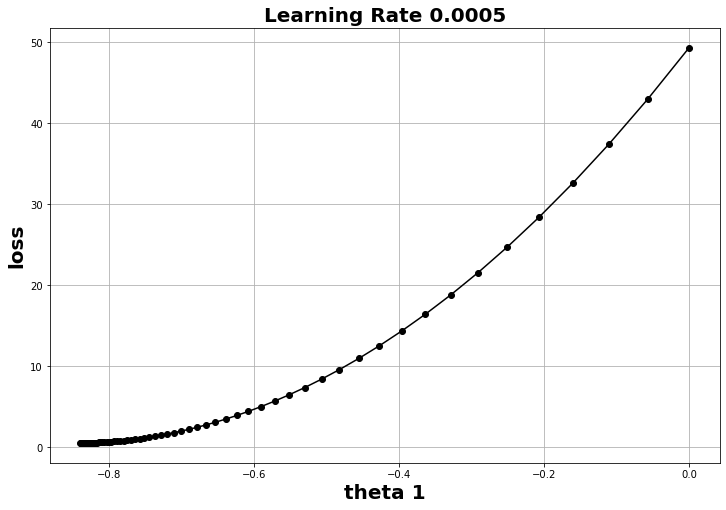

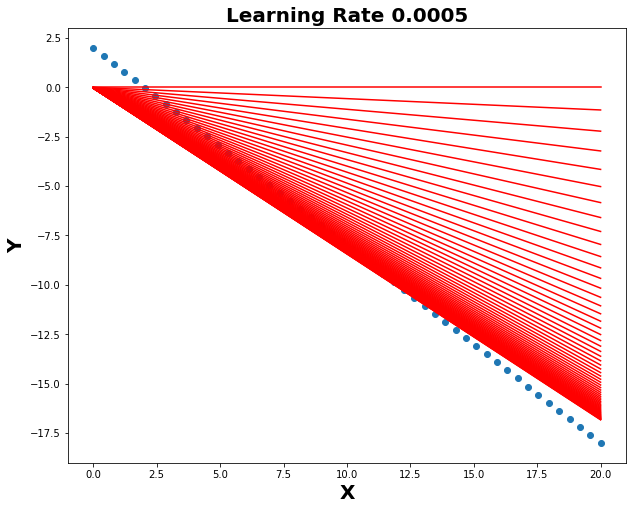

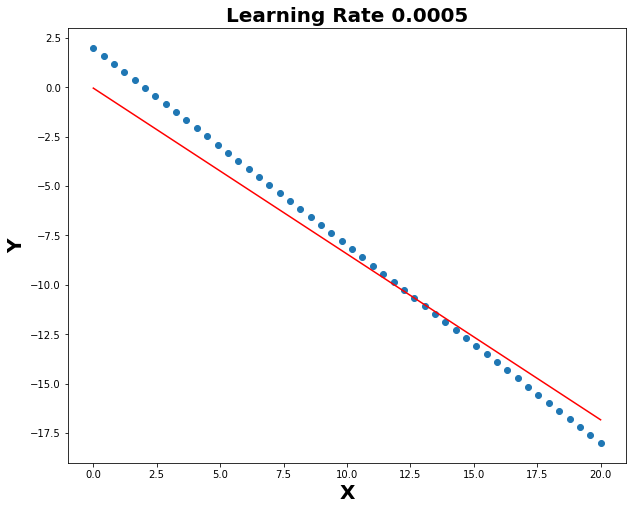

In [73]:
title= 'Learning Rate ' +str(0.0005)
plotLoss(loss_mat,title)
plotThetaVsLoss(loss_mat,theta[0,:],title)
plotThetaVsLoss(loss_mat,theta[1,:],title,x_label="theta 1")
plotAllLines(X,y,theta,title)
plotBestFit(X,y,theta[:,-1],title)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [19]:
def momentumGD(X,y,alpha = 0.001,gamma=0.5,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    theta_n = np.zeros((X.shape[1],1))
    theta = []
    v=np.zeros((X.shape[1],1))
    #print(theta.shape)
    curr_iter=0
    norm_gradiant_vector= 10000000
    j_mat=[]
    while(curr_iter <= max_iter):
        theta.append(theta_n)
        h_x = np.dot(X,theta_n)
        print(h_x.shape)
        Error_Vector =h_x - y
        print(Error_Vector.shape)
        j = (np.linalg.norm(Error_Vector)**2)/(2*(Error_Vector.shape[0]))
        j_mat.append(j)
        
        d_theta = np.dot(X.transpose(),Error_Vector)/(Error_Vector.shape[0])
        print(d_theta.shape)
        norm_gradiant_vector=np.linalg.norm(d_theta)   
        if  norm_gradiant_vector < grad_norm_min or (len(j_mat)>1) and (abs(j_mat[-2]-j_mat[-1]) <= 0.001):
            break
        # momentum variation    
        v = gamma*v+ alpha*d_theta
        theta_n=theta_n - v 
        
        print(theta_n.shape)
        #theta =  np.c_[ theta, theta_n ]

        
        print("****************** Iteration " +str(curr_iter) + " ********************"+"\n")
        #print("h(x) = " + str(h_x)+"\n")
        #print("Error Vector : "+ str(Error_Vector)+"\n")
        print("Cost = "+str(j)+"\n")
        print("gradiant vector = " + str(d_theta)+"\n")
        print("gradiant vector norm = " + str(norm_gradiant_vector)+"\n")
        print("theta : "+str(theta_n)+"\n")  
        curr_iter+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", curr_iter-1," epochs")
    print("theta_0_Opt : ",theta[-1][0],"")
    print("theta_0_Opt : ",theta[-1][1],"")
    print("Error Vector : "+ str(Error_Vector)+"\n")
    print("h(x): y predict = " + str(h_x)+"\n")
    print("y actual: ", str(y))    
        
    return np.array(theta).reshape((len(theta),len(theta[0]))).transpose(),j_mat 

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [20]:
thetaM,loss_matM = momentumGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=0.5,max_iter=300,grad_norm_min=0.001)

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 0 ********************

Cost = 49.346938775510196

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [[-0.004     ]
 [-0.05734694]]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 1 ********************

Cost = 42.96137982976481

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 107.18690433895927

theta : [[-0.00971127]
 [-0.13948521]]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 2 ********************

Cost = 34.595052736755676

gradiant vector = [[ 6.59543667]
 [95.80896162]]

gradiant vector norm = 96.03570643965884

theta : [[-0.01586462]
 [-0.22845882]]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 3 ********************

Cost = 26.568631719629956

gradiant vector = [[ 5.69954718]
 [83.76322697]]

gradiant vector norm = 83.95691175071546

theta : [[-0.02179107]
 [-0.31482724]]

(50, 1)
(50, 1)
(2, 1)
(2, 

In [21]:
r2_score(y,X@thetaM[:,-1])

0.9687892837396442

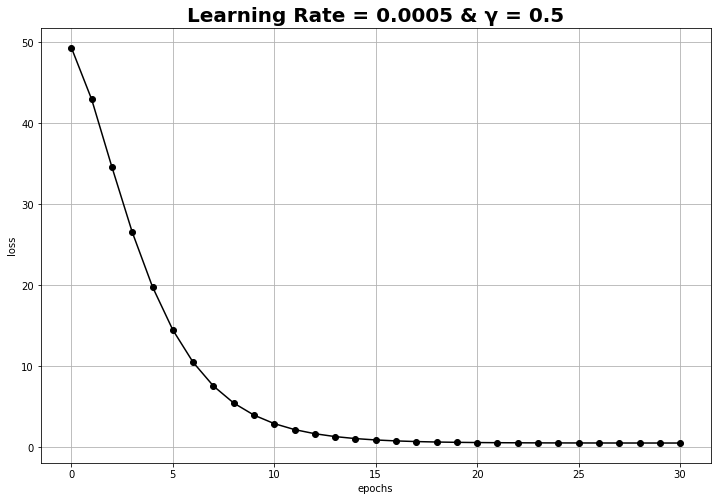

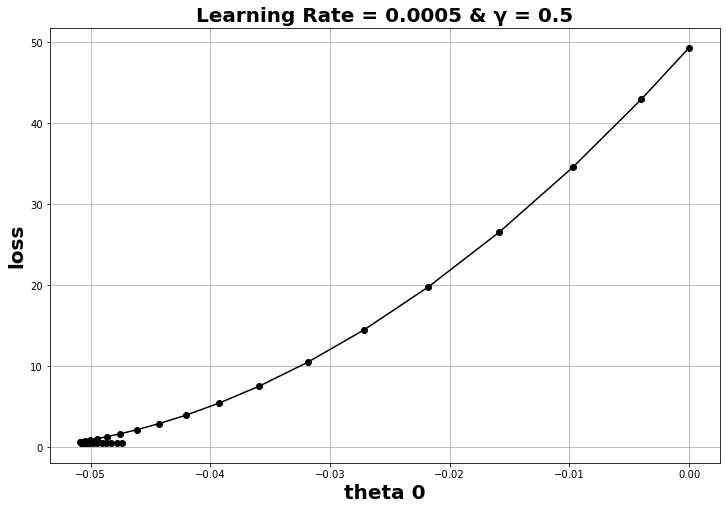

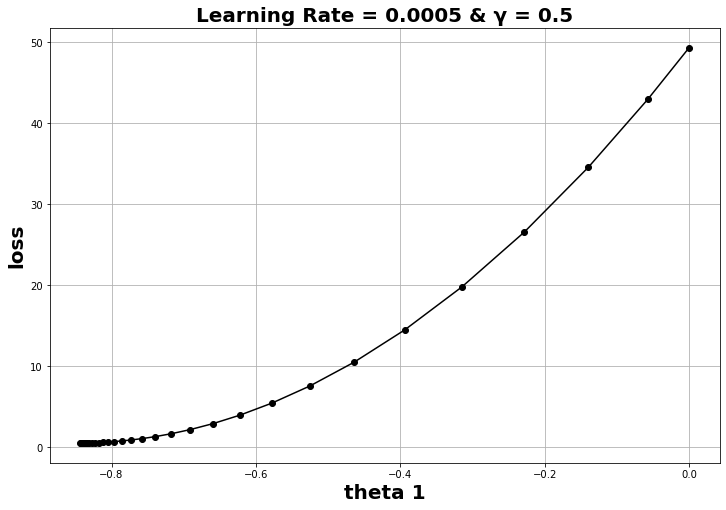

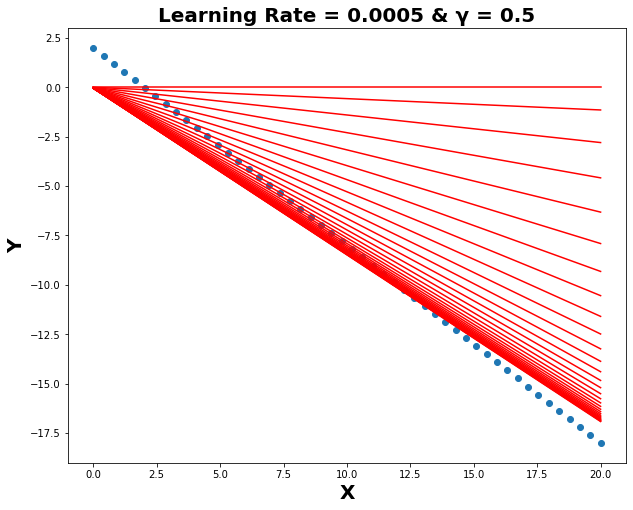

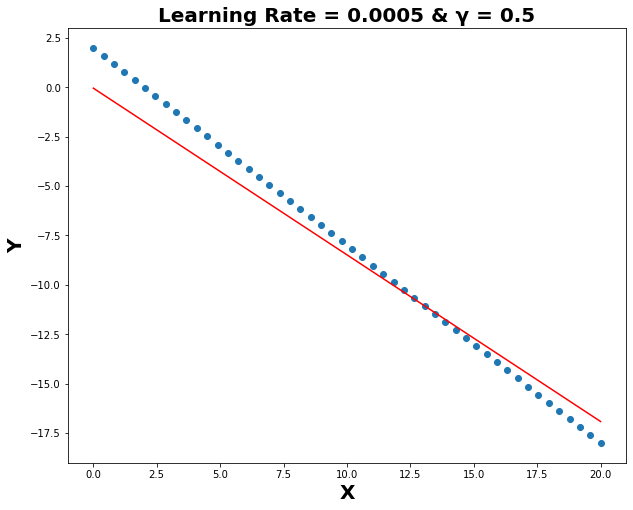

In [76]:
title= "Learning Rate = 0.0005 & γ = 0.5" 
plotLoss(loss_matM,title)
plotThetaVsLoss(loss_matM,thetaM[0,:],title)
plotThetaVsLoss(loss_matM,thetaM[1,:],title,x_label="theta 1")
plotAllLines(X,y,thetaM,title)
plotBestFit(X,y,thetaM[:,-1],title)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

# In Momentum Gradient descent we use velocity * gamma to resist the vanishing gradient issue. If the momentum parameter gamma is zero it means that we do not depend on the momentum and the results are exactly the vanilla Gradient descent with the same parameters 

# If the gamma is 1 then we hightly depend on the momentum and it will be harder for the model to converge as it will have high oscillations when it comes near a local minimum point.

In [90]:
# momentum = 1 high dependancy on the previous velocity
thetaM,loss_matM = momentumGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=1,max_iter=1000,grad_norm_min=0.001)

(50, 1)
(50, 1)
j = 49.346938775510196

(2, 1)
(2, 1)
****************** Iteration 0 ********************

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [-0.004      -0.05734694]

(50, 1)
(50, 1)
j = 42.96137982976481

(2, 1)
(2, 1)
****************** Iteration 1 ********************

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 107.18690433895927

theta : [-0.01171127 -0.16815868]

(50, 1)
(50, 1)
j = 31.890632492387507

(2, 1)
(2, 1)
****************** Iteration 2 ********************

gradiant vector = [[ 6.30670198]
 [91.92682084]]

gradiant vector norm = 92.14290466631515

theta : [-0.02257588 -0.32493382]

(50, 1)
(50, 1)
j = 19.082646914552008

(2, 1)
(2, 1)
****************** Iteration 3 ********************

gradiant vector = [[ 4.72808589]
 [70.7015222 ]]

gradiant vector norm = 70.85943859340523

theta : [-0.03580454 -0.51705973]

(50, 1)
(50, 1)
j = 7.947944448277065

(2, 1)
(2, 1)
******

(50, 1)
(50, 1)
j = 27.715159978443737

(2, 1)
(2, 1)
****************** Iteration 219 ********************

gradiant vector = [[ 6.805598 ]
 [85.8381454]]

gradiant vector norm = 86.10751053147395

theta : [ 3.68174108 -0.6575228 ]

(50, 1)
(50, 1)
j = 15.072871387061422

(2, 1)
(2, 1)
****************** Iteration 220 ********************

gradiant vector = [[ 5.10651309]
 [62.94699294]]

gradiant vector norm = 63.15378370787554

theta : [ 3.68077859 -0.85906386]

(50, 1)
(50, 1)
j = 5.11904462819409

(2, 1)
(2, 1)
****************** Iteration 221 ********************

gradiant vector = [[ 3.09013996]
 [35.79102064]]

gradiant vector norm = 35.92417185633595

theta : [ 3.67827103 -1.07850044]

(50, 1)
(50, 1)
j = 0.5058600206886493

(2, 1)
(2, 1)
****************** Iteration 222 ********************

gradiant vector = [[0.89326665]
 [6.20918196]]

gradiant vector norm = 6.273106565520791

theta : [ 3.67531683 -1.3010416 ]

(50, 1)
(50, 1)
j = 2.4633294093941545

(2, 1)
(2, 1)
********

(50, 1)
(50, 1)
j = 0.11159010834280349

(2, 1)
(2, 1)
****************** Iteration 415 ********************

gradiant vector = [[-0.40242322]
 [-5.48180081]]

gradiant vector norm = 5.496552063981667

theta : [ 1.97808605 -1.2589536 ]

(50, 1)
(50, 1)
j = 4.573068378182603

(2, 1)
(2, 1)
****************** Iteration 416 ********************

gradiant vector = [[ -2.61144991]
 [-35.09860344]]

gradiant vector norm = 35.19561953170675

theta : [ 1.93977833 -1.45834562]

(50, 1)
(50, 1)
j = 14.426129160613947

(2, 1)
(2, 1)
****************** Iteration 417 ********************

gradiant vector = [[ -4.64367786]
 [-62.33856533]]

gradiant vector norm = 62.51128274865727

theta : [ 1.90379244 -1.62656836]

(50, 1)
(50, 1)
j = 27.047027821598153

(2, 1)
(2, 1)
****************** Iteration 418 ********************

gradiant vector = [[ -6.36189114]
 [-85.35699728]]

gradiant vector norm = 85.59375352821971

theta : [ 1.87098751 -1.7521126 ]

(50, 1)
(50, 1)
j = 39.07501061998676

(2, 1)
(2, 

(2, 1)
(2, 1)
****************** Iteration 624 ********************

gradiant vector = [[  7.58798894]
 [107.06723658]]

gradiant vector norm = 107.33578492222479

theta : [ 0.61949216 -0.04570601]

(50, 1)
(50, 1)
j = 49.11010696419834

(2, 1)
(2, 1)
****************** Iteration 625 ********************

gradiant vector = [[  8.16243205]
 [114.73247932]]

gradiant vector norm = 115.022463490531

theta : [ 0.63620835 -0.04770768]

(50, 1)
(50, 1)
j = 49.01697021343723

(2, 1)
(2, 1)
****************** Iteration 626 ********************

gradiant vector = [[  8.15913155]
 [114.63002864]]

gradiant vector norm = 114.92003695081765

theta : [ 0.64884497 -0.10702436]

(50, 1)
(50, 1)
j = 42.55014329456792

(2, 1)
(2, 1)
****************** Iteration 627 ********************

gradiant vector = [[  7.57860134]
 [106.76680078]]

gradiant vector norm = 107.03543780572144

theta : [ 0.6576923  -0.21972445]

(50, 1)
(50, 1)
j = 31.430028700271418

(2, 1)
(2, 1)
****************** Iteration 628 **


(50, 1)
(50, 1)
j = 11.592592409906796

(2, 1)
(2, 1)
****************** Iteration 826 ********************

gradiant vector = [[ -3.53068486]
 [-54.59153835]]

gradiant vector norm = 54.70559198727929

theta : [ 4.01593398 -1.73656994]

(50, 1)
(50, 1)
j = 23.721321147560914

(2, 1)
(2, 1)
****************** Iteration 827 ********************

gradiant vector = [[ -5.34976541]
 [-79.05212133]]

gradiant vector norm = 79.23293429163091

theta : [ 4.00669947 -1.87776099]

(50, 1)
(50, 1)
j = 36.28781239619095

(2, 1)
(2, 1)
****************** Iteration 828 ********************

gradiant vector = [[ -6.77091047]
 [-98.16203711]]

gradiant vector norm = 98.39527812705637

theta : [ 4.00085041 -1.96987103]

(50, 1)
(50, 1)
j = 45.9459181720507

(2, 1)
(2, 1)
****************** Iteration 829 ********************

gradiant vector = [[  -7.69785989]
 [-110.62718563]]

gradiant vector norm = 110.89468538916468

theta : [ 3.99885028 -2.00666747]

(50, 1)
(50, 1)
j = 50.123926122262375

(2, 1)


In [77]:
# momentum zero and it is equal to the vanilla gradient descent 

thetaM,loss_matM = momentumGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=0,max_iter=300,grad_norm_min=0.001)

(2, 1)
(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 0 ********************

j = 49.346938775510196

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [-0.004      -0.05734694]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 1 ********************

j = 42.96137982976481

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 107.18690433895927

theta : [-0.00771127 -0.11081174]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 2 ********************

j = 37.41136489517328

gradiant vector = [[ 6.88417137]
 [99.69110239]]

gradiant vector norm = 99.92851300714295

theta : [-0.01115335 -0.16065729]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 3 ********************

j = 32.58756147787421

gradiant vector = [[ 6.38227377]
 [92.94279097]]

gradiant vector norm = 93.16166492307666

theta : [-0.01434449 -0.20712868]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Itera

In [79]:
thetaM,loss_matM = momentumGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=0.9,max_iter=300,grad_norm_min=0.001)

(2, 1)
(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 0 ********************

j = 49.346938775510196

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [-0.004      -0.05734694]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 1 ********************

j = 42.96137982976481

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 107.18690433895927

theta : [-0.01131127 -0.16242398]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 2 ********************

j = 32.422565188137185

gradiant vector = [[ 6.36444892]
 [92.703249  ]]

gradiant vector norm = 92.92146460853121

theta : [-0.02107363 -0.30334494]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 3 ********************

j = 20.647830716719696

gradiant vector = [[ 4.94547692]
 [73.62443442]]

gradiant vector norm = 73.79034547469081

theta : [-0.03233249 -0.46698603]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Ite

In [80]:
r2_score(y,X@thetaM[:,-1])

0.973589591111118

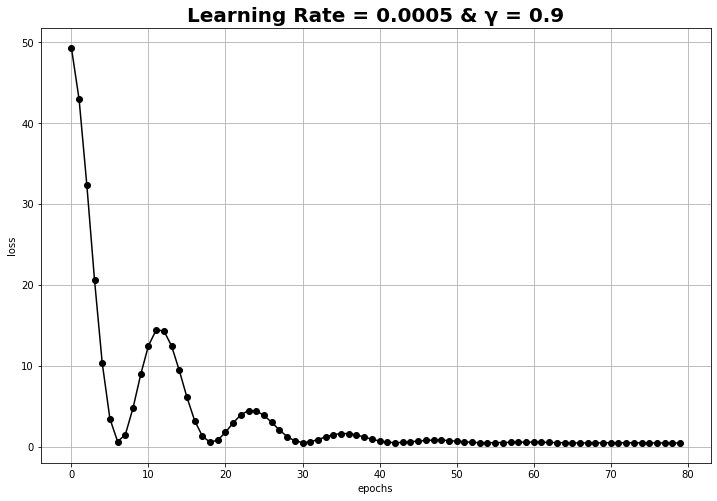

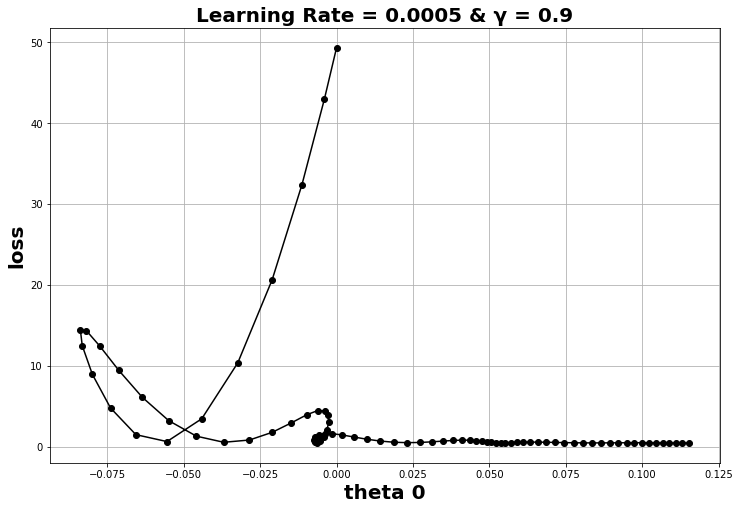

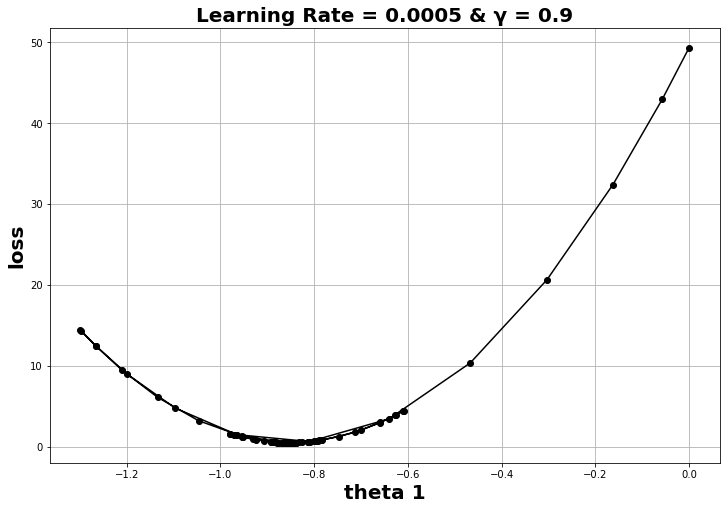

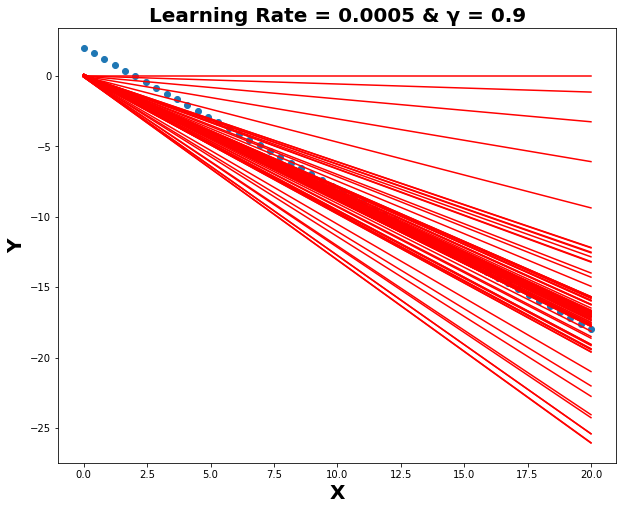

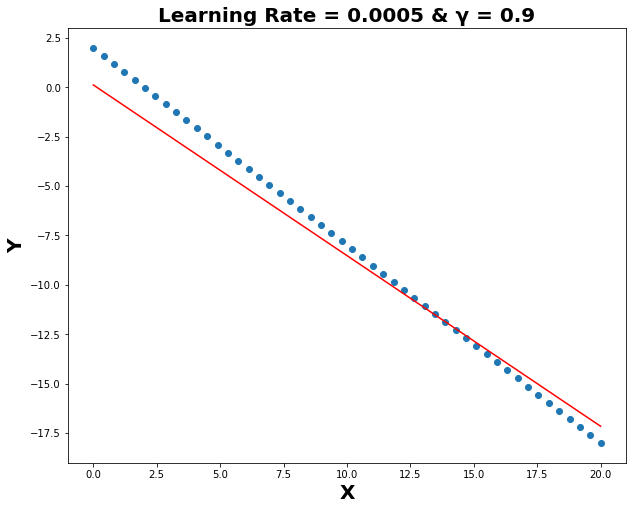

In [82]:
title= "Learning Rate = 0.0005 & γ = 0.9" 
plotLoss(loss_matM,title)
plotThetaVsLoss(loss_matM,thetaM[0,:],title)
plotThetaVsLoss(loss_matM,thetaM[1,:],title,x_label="theta 1")
plotAllLines(X,y,thetaM,title)
plotBestFit(X,y,thetaM[:,-1],title)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [83]:
thetaM,loss_matM = momentumGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=0.89,max_iter=300,grad_norm_min=0.001)

(2, 1)
(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 0 ********************

j = 49.346938775510196

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [-0.004      -0.05734694]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 1 ********************

j = 42.96137982976481

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 107.18690433895927

theta : [-0.01127127 -0.16185051]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 2 ********************

j = 32.47600461992306

gradiant vector = [[ 6.37022361]
 [92.78089181]]

gradiant vector norm = 92.9993206144656

theta : [-0.0209278  -0.30124914]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Iteration 3 ********************

j = 20.803153317662435

gradiant vector = [[ 4.96658081]
 [73.90818493]]

gradiant vector norm = 74.07487242298458

theta : [-0.03200541 -0.46226801]

(50, 1)
(50, 1)
(2, 1)
(2, 1)
****************** Itera

In [84]:
r2_score(y,X@thetaM[:,-1])

0.972435565060376

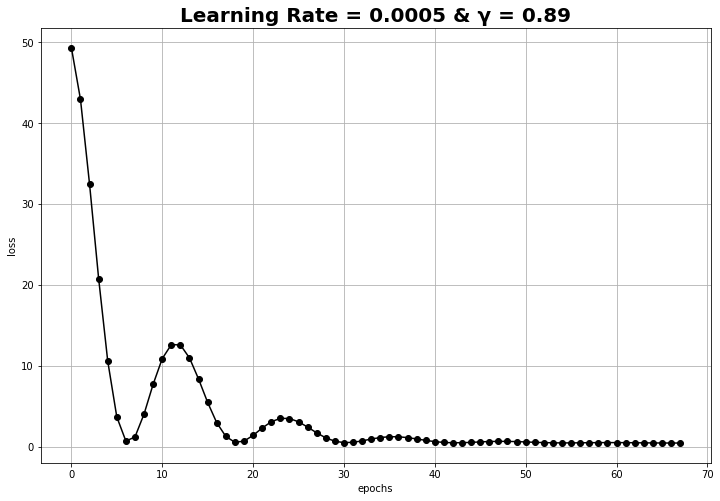

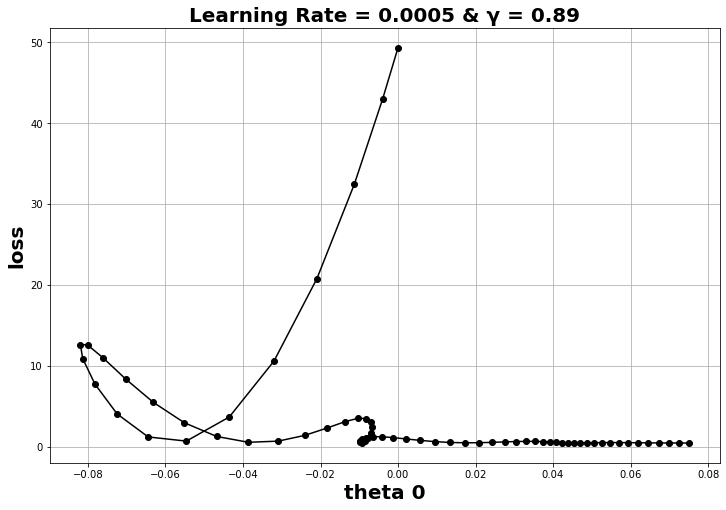

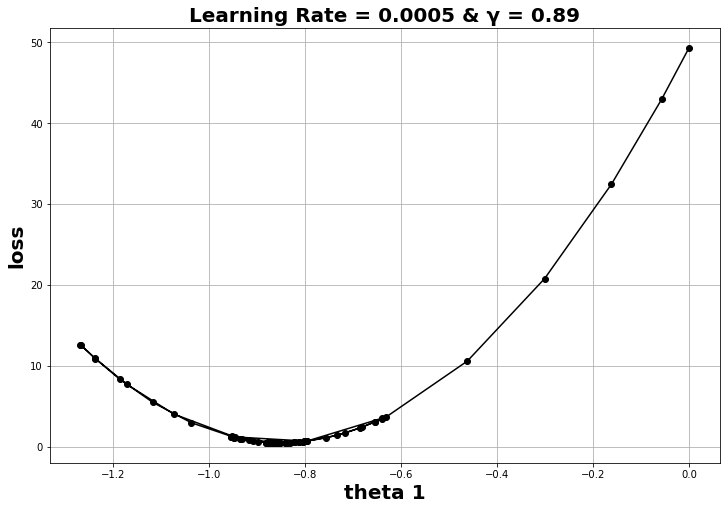

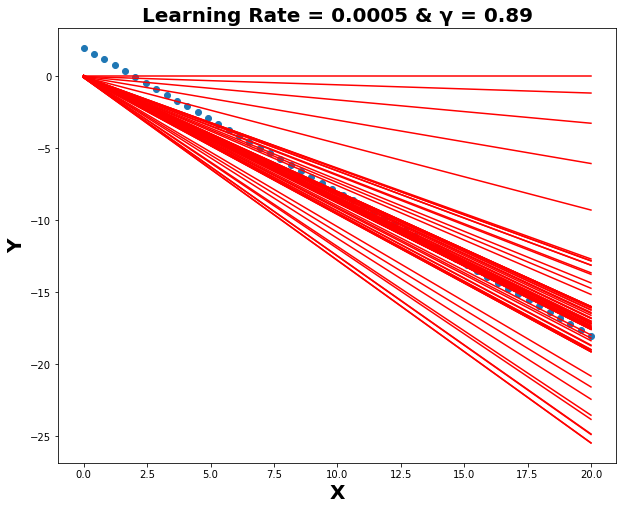

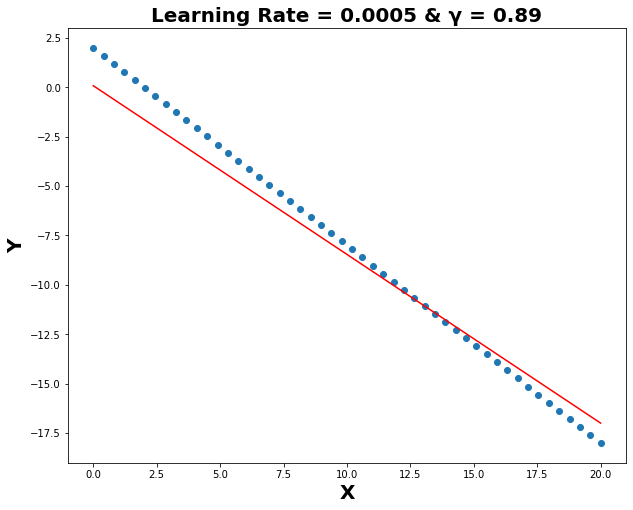

In [85]:
title= "Learning Rate = 0.0005 & γ = 0.89" 
plotLoss(loss_matM,title)
plotThetaVsLoss(loss_matM,thetaM[0,:],title)
plotThetaVsLoss(loss_matM,thetaM[1,:],title,x_label="theta 1")
plotAllLines(X,y,thetaM,title)
plotBestFit(X,y,thetaM[:,-1],title)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

# NAG competes the high oscillations of momentum based GD around local minimum points.

# It does so by (looking ahead step) by calculation theta temporary then compute the gradient of this theta_temp and make a correction based on it. So it is faster than momentum GD.

# if we set Gamma = 0  this model will act exactly like Normal GD and with gamma approaching one it will have higher oscillation than Normal GD but less than momentum GD

In [42]:
def NAGGD(X,y,alpha = 0.001,gamma=0.5,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    theta_n = np.zeros((X.shape[1],1))
    theta = []
    v=np.zeros((X.shape[1],1))
    #print(theta.shape)
    curr_iter=0
    norm_gradiant_vector= 10000000
    j_mat=[]
    while(curr_iter <= max_iter):
        theta.append(theta_n)
        # check 
        
        h_x = np.dot(X,theta_n)
        #print(h_x.shape)
        Error_Vector =h_x - y
        #print(Error_Vector.shape)
        j = (np.linalg.norm(Error_Vector)**2)/(2*(Error_Vector.shape[0]))
        j_mat.append(j)

        d_theta = np.dot(X.transpose(),Error_Vector)/(Error_Vector.shape[0])
        #print(d_theta.shape)
        norm_gradiant_vector=np.linalg.norm(d_theta)   
        if  norm_gradiant_vector < grad_norm_min  or ((len(j_mat)>1) and (abs(j_mat[-2]-j_mat[-1]) <= 0.001)):
            
            break
        
        # NAG variation
        theta_tmp= theta_n - gamma*v #first step 
        
        h_x_tmp = np.dot(X,theta_tmp)
        #print(h_x.shape)
        Error_Vector_tmp =h_x_tmp - y
        #print(Error_Vector.shape)
        j = (np.linalg.norm(Error_Vector_tmp)**2)/(2*(Error_Vector_tmp.shape[0]))
        #print("j = "+str(j)+"\n")
        d_theta_tmp = np.dot(X.transpose(),Error_Vector_tmp)/(Error_Vector_tmp.shape[0])
        #print(d_theta.shape)
        norm_gradiant_vector=np.linalg.norm(d_theta_tmp)   
            
        theta_n = theta_tmp - alpha*d_theta_tmp #2nd step
        v=gamma*v + alpha*d_theta_tmp  # 3rd step
        
        #print(theta_n.shape)
        #theta =  np.c_[ theta, theta_n ]

        
        print("****************** Iteration " +str(curr_iter) + " ********************"+"\n")
        #print("h(x) = " + str(h_x)+"\n")
        #print("Error Vector : "+ str(Error_Vector)+"\n")
        
        print("gradiant vector = " + str(d_theta)+"\n")
        print("gradiant vector norm = " + str(norm_gradiant_vector)+"\n")
        print("theta : "+str(theta_n)+"\n")  
        print("v = ", v)
        curr_iter+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", curr_iter-1," epochs")
    print("theta_0_Opt : ",theta[-1][0],"")
    print("theta_0_Opt : ",theta[-1][1],"")
    print("Error Vector : "+ str(Error_Vector)+"\n")
    print("h(x): y predict = " + str(h_x)+"\n")
    print("y actual: ", str(y))    
        
    return np.array(theta).reshape((len(theta),len(theta[0]))).transpose(),j_mat  

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [48]:
thetaNAG,loss_matNAG = NAGGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=0.9,max_iter=300,grad_norm_min=0.001)

****************** Iteration 0 ********************

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [[-0.004     ]
 [-0.05734694]]

v =  [[0.004     ]
 [0.05734694]]
****************** Iteration 1 ********************

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 100.17984166443891

theta : [[-0.0110514 ]
 [-0.15893005]]

v =  [[0.0070514 ]
 [0.10158312]]
****************** Iteration 2 ********************

gradiant vector = [[ 6.39964805]
 [93.17645815]]

gradiant vector norm = 80.98419165715534

theta : [[-0.02013719]
 [-0.29075418]]

v =  [[0.00908579]
 [0.13182412]]
****************** Iteration 3 ********************

gradiant vector = [[ 5.07232104]
 [75.32969814]]

gradiant vector norm = 59.39433349173387

theta : [[-0.03025327]
 [-0.43902969]]

v =  [[0.01011607]
 [0.14827552]]
****************** Iteration 4 ********************

gradiant vector = [[ 3.5794498 ]
 [55.25673313]]

gradiant vector

In [49]:
r2_score(y,X@thetaNAG[:,-1])

0.971103130756324

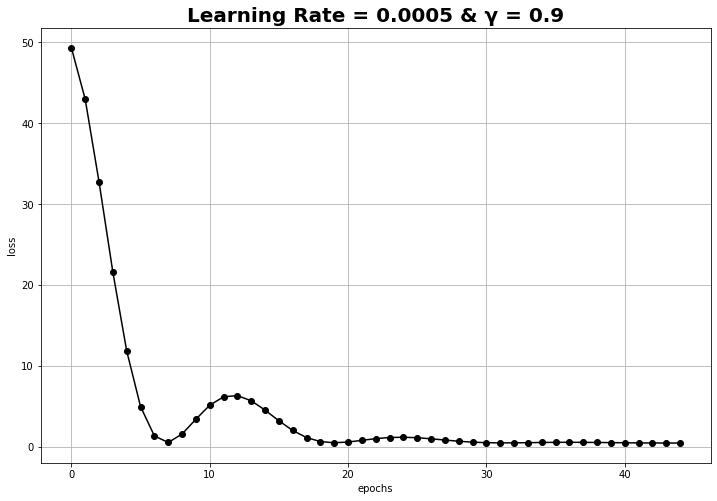

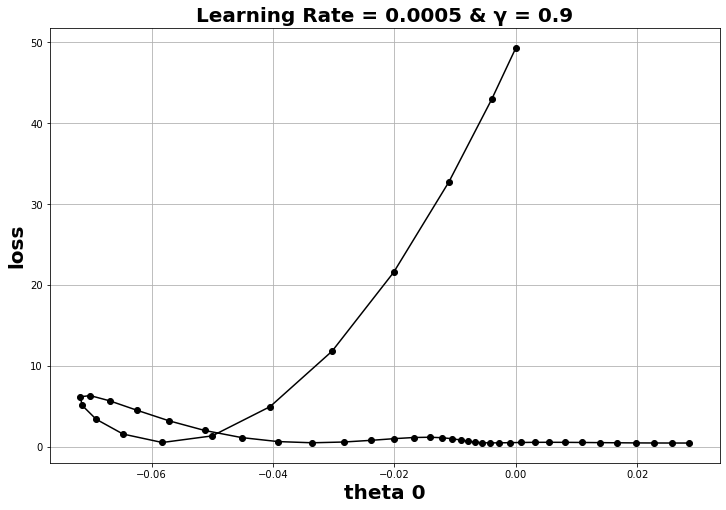

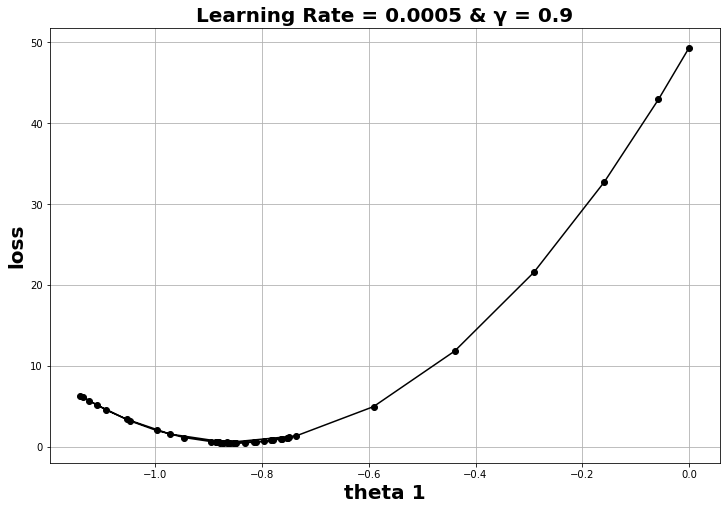

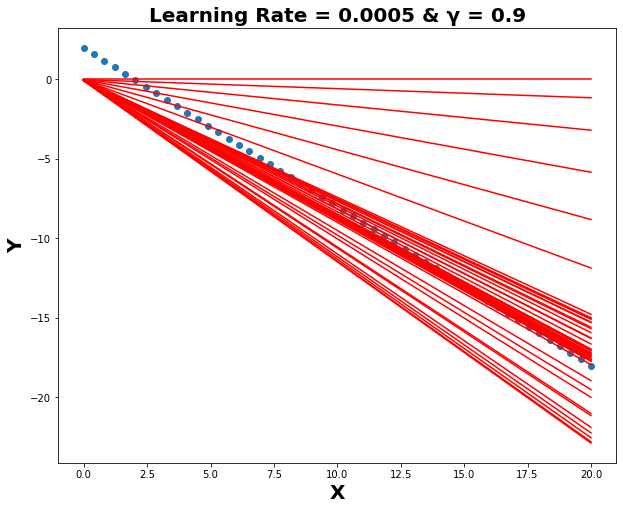

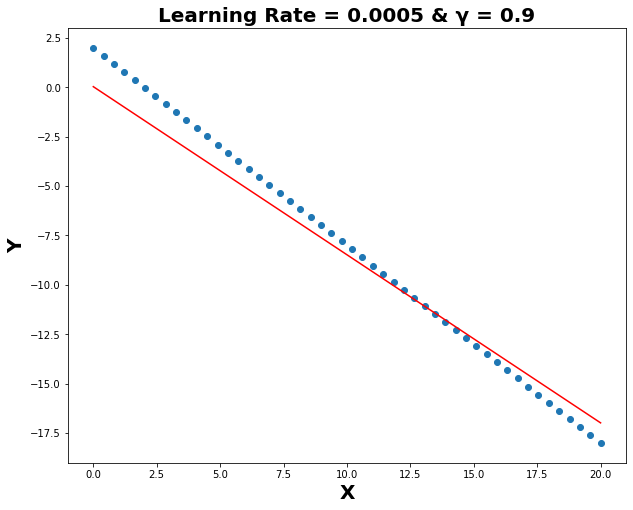

In [37]:
title= "Learning Rate = 0.0005 & γ = 0.9" 
plotLoss(loss_matNAG,title)
plotThetaVsLoss(loss_matNAG,thetaNAG[0,:],title)
plotThetaVsLoss(loss_matNAG,thetaNAG[1,:],title,x_label="theta 1")
plotAllLines(X,y,thetaNAG,title)
plotBestFit(X,y,thetaNAG[:,-1],title)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [50]:
thetaNAG,loss_matNAG = NAGGD(X,y.reshape(-1,1),alpha = 0.0005,gamma=0.89,max_iter=300,grad_norm_min=0.001)

****************** Iteration 0 ********************

gradiant vector = [[  8.        ]
 [114.69387755]]

gradiant vector norm = 114.97254258164628

theta : [[-0.004     ]
 [-0.05734694]]

v =  [[0.004     ]
 [0.05734694]]
****************** Iteration 1 ********************

gradiant vector = [[  7.42253061]
 [106.929596  ]]

gradiant vector norm = 100.25769784628375

theta : [[-0.01101429]
 [-0.15839541]]

v =  [[0.00701429]
 [0.10104847]]
****************** Iteration 2 ********************

gradiant vector = [[ 6.40503164]
 [93.24884308]]

gradiant vector norm = 81.25928243442421

theta : [[-0.02000674]
 [-0.28886503]]

v =  [[0.00899245]
 [0.13046962]]
****************** Iteration 3 ********************

gradiant vector = [[ 5.09134296]
 [75.58545915]]

gradiant vector norm = 59.99339334545299

theta : [[-0.0299711 ]
 [-0.43491552]]

v =  [[0.00996436]
 [0.14605049]]
****************** Iteration 4 ********************

gradiant vector = [[ 3.62087372]
 [55.81370896]]

gradiant vector

In [51]:
r2_score(y,X@thetaNAG[:,-1])

0.9699718983158406

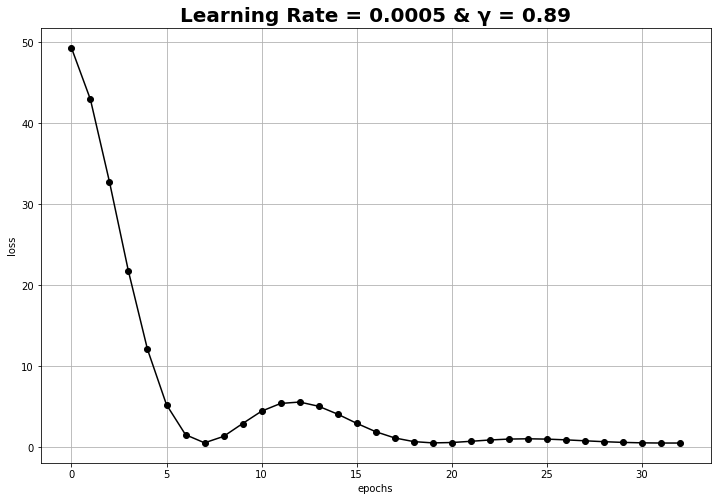

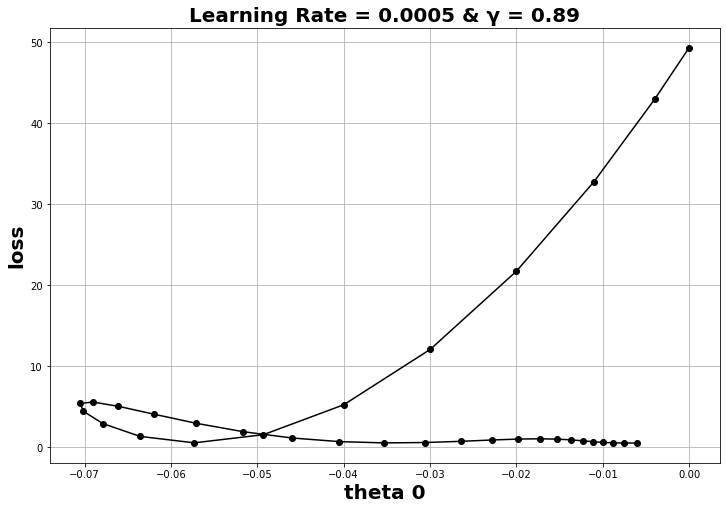

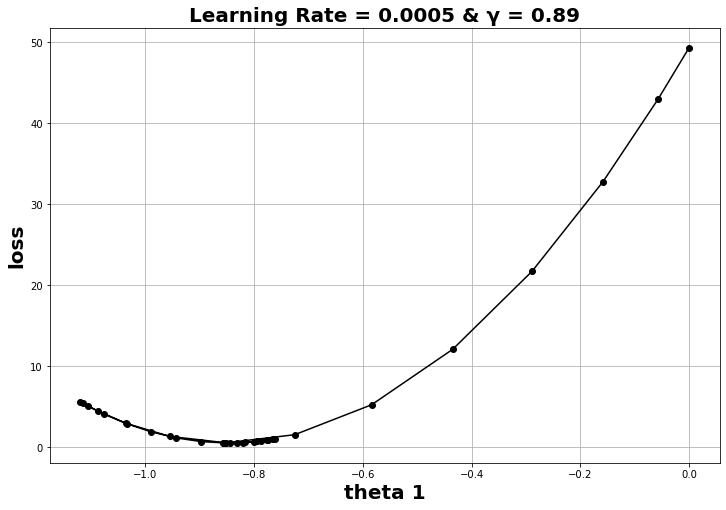

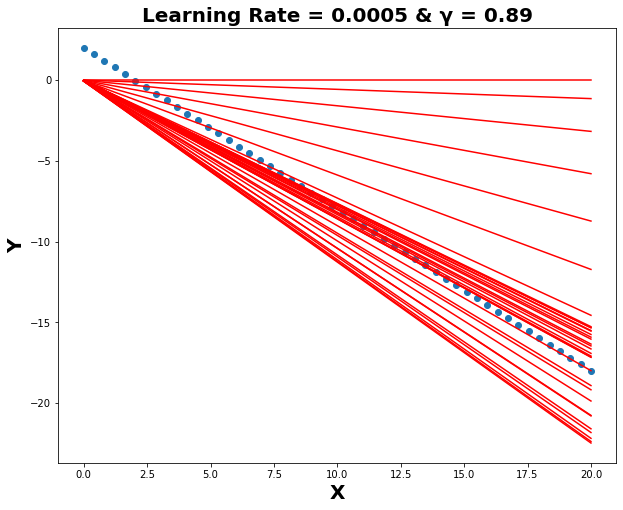

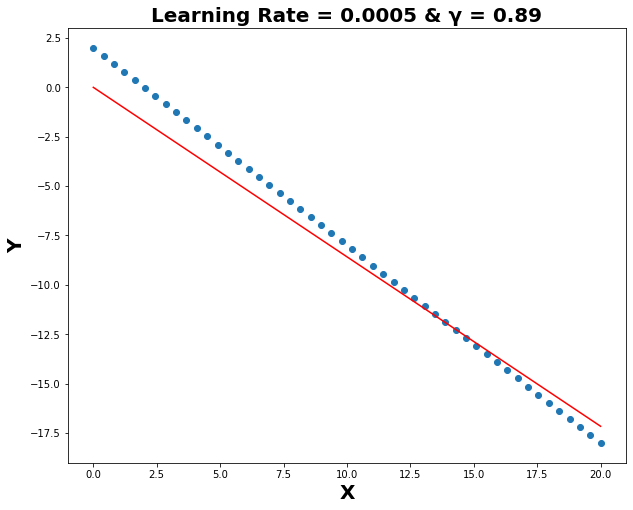

In [40]:
title= "Learning Rate = 0.0005 & γ = 0.89" 
plotLoss(loss_matNAG,title)
plotThetaVsLoss(loss_matNAG,thetaNAG[0,:],title)
plotThetaVsLoss(loss_matNAG,thetaNAG[1,:],title,x_label="theta 1")
plotAllLines(X,y,thetaNAG,title)
plotBestFit(X,y,thetaNAG[:,-1],title)